In [1]:
import sys
import os
import uproot
import glob
import pandas as pd
import numpy as np
import ROOT
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
TrainConfig=sys.argv[1]
TrainConfig="TrainConfig"
print("Importing settings from "+ TrainConfig)
exec("from "+TrainConfig+" import *")

Importing settings from TrainConfig


In [3]:

print("Making output directory")
os.system("mkdir -p " + OutputDirName)
os.system("cp TrainConfig.py ./"+ OutputDirName+"/")
os.system("cp Trainer.py ./"+ OutputDirName+"/")

Making output directory


0

In [4]:
cat='EleType'
weight="NewWt",""
label=["Background","Signal"]

In [5]:
#Works in uproot3
print("Making data frames")
Sigdf=pd.DataFrame()
Bkgdf=pd.DataFrame()
for SigFile,SigXsecWt in zip(SigFiles,SigXsecWts):
    Sigdfi = uproot.open(SigFile).get(Tree).pandas.df().query(SigCut+' & '+CommonCut)
    Sigdfi['xsecwt']=SigXsecWt
    Sigdf=pd.concat([Sigdf,Sigdfi],ignore_index=True, sort=False)
for BkgFile,BkgXsecWt in zip(BkgFiles,BkgXsecWts):
    Bkgdfi = uproot.open(BkgFile).get(Tree).pandas.df().query(BkgCut+' & '+CommonCut)
    Bkgdf=pd.concat([Bkgdf,Bkgdfi],ignore_index=True, sort=False)

Making data frames


In [6]:
Sigdf[cat]=1
Bkgdf[cat]=0

Sigdf["Type"]="Signal"
Bkgdf["Type"]="Background"

#Reweighing
Sigdf[weight]=1
Bkgdf[weight]=1

df_final=pd.concat([Sigdf,Bkgdf],ignore_index=True, sort=False)
from sklearn.model_selection import train_test_split
EB_train, EB_test = train_test_split(df_final, test_size=testsize, random_state=RandomState, shuffle=True)

TrainIndices=EB_train.index.values.tolist()
TestIndices=EB_test.index.values.tolist()

df_final.loc[TrainIndices,'Dataset'] = "Train"
df_final.loc[TestIndices,'Dataset'] = "Test"

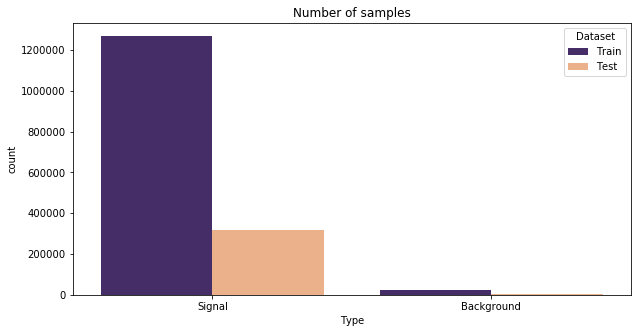

In [7]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(x="Type", data=df_final, ax=axes,hue='Dataset',palette=['#432371',"#FAAE7B"])
axes.set_title("Number of samples")
plt.savefig(OutputDirName+"/TotalStat_TrainANDTest.png")
    

Making feature plots


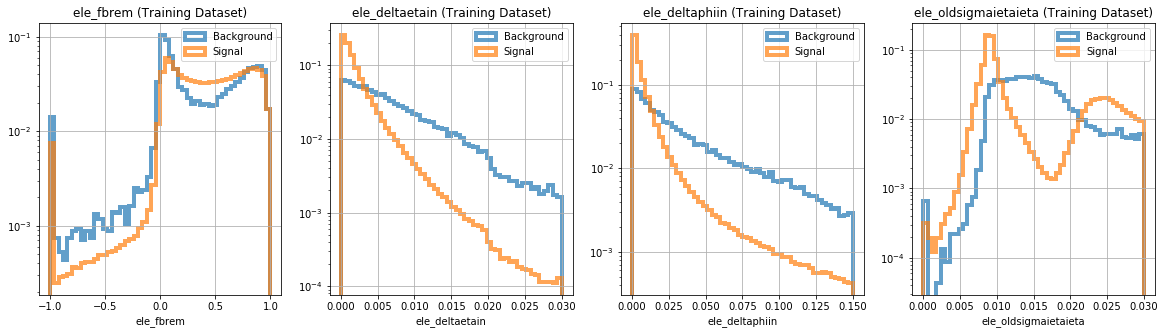

In [8]:
fig, axes = plt.subplots(1, len(features), figsize=(len(features)*5, 5))
print("Making feature plots")
for m in range(len(features)):
    for i,group_df in df_final[df_final['Dataset'] == "Train"].groupby(cat):
        group_df[features[m-1]].hist(histtype='step', bins=feature_bins[m-1], alpha=0.7,label=label[i], ax=axes[m-1], density=False, ls='-', weights =group_df[weight]/group_df[weight].sum(),linewidth=4)
        #df_new = pd.concat([group_df, df_new],ignore_index=True, sort=False)                                                                                            
    axes[m-1].legend(loc='upper right')
    axes[m-1].set_xlabel(features[m-1])
    axes[m-1].set_yscale("log")
    axes[m-1].set_title(features[m-1]+" (Training Dataset)")
plt.savefig(OutputDirName+"/featureplots_Training.png")

Making feature plots


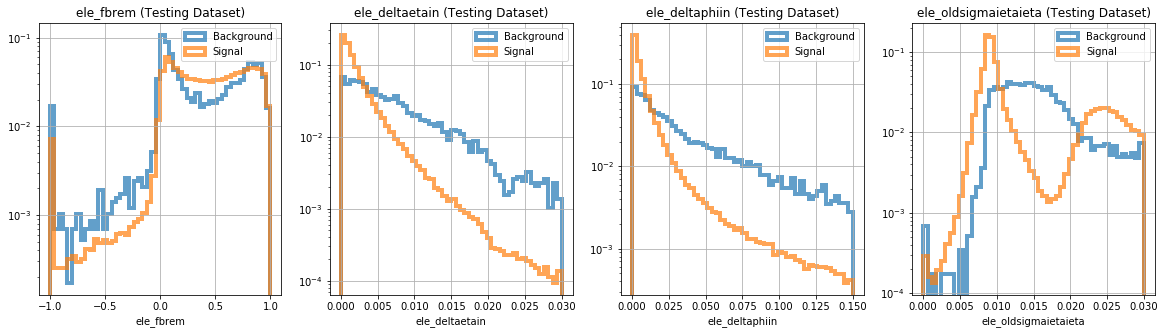

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(features), figsize=(len(features)*5, 5))
print("Making feature plots")
for m in range(len(features)):
    for i,group_df in df_final[df_final['Dataset'] == "Test"].groupby(cat):
        group_df[features[m-1]].hist(histtype='step', bins=feature_bins[m-1], alpha=0.7,label=label[i], ax=axes[m-1], density=False, ls='-', weights =group_df[weight]/group_df[weight].sum(),linewidth=4)
        #df_new = pd.concat([group_df, df_new],ignore_index=True, sort=False)                                                                                            
    axes[m-1].legend(loc='upper right')
    axes[m-1].set_xlabel(features[m-1])
    axes[m-1].set_yscale("log")
    axes[m-1].set_title(features[m-1]+" (Testing Dataset)")
plt.savefig(OutputDirName+"/featureplots_Testing.png")

In [11]:
os.system("convert "+OutputDirName+"/*.png "+OutputDirName+"/mydoc.pdf")

0

convert: /cvmfs/sft.cern.ch/lcg/views/LCG_97py3cu10/x86_64-centos7-gcc7-opt/lib/libtiff.so.5: no version information available (required by /cvmfs/sft.cern.ch/lcg/views/LCG_97py3cu10/x86_64-centos7-gcc7-opt/lib/libMagickCore-7.Q16HDRI.so.6)
convert: UnableToOpenConfigureFile `magic.xml' @ warning/configure.c/GetConfigureOptions/714.
